In [2]:
!pip install iv2_utils
from datasets import *
from iv2_utils import iv2

dataset = load_dataset("friedrichor/ActivityNet_Captions", split = "val1")

  Using cached iv2_utils-0.3.2-py3-none-any.whl.metadata (594 bytes)
Using cached iv2_utils-0.3.2-py3-none-any.whl (4.2 kB)


Generating val2 split: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4885/4885 [00:00<00:00, 142975.00 examples/s]


In [3]:
dataset

Dataset({
    features: ['video_id', 'video', 'caption', 'source', 'duration', 'timestamps', 'sentences'],
    num_rows: 4917
})

In [4]:
dataset[0]

{'video_id': 'v_uqiMw7tQ1Cc',
 'video': 'v_uqiMw7tQ1Cc.mp4',
 'caption': 'A weight lifting tutorial is given. The coach helps the guy in red with the proper body placement and lifting technique.',
 'source': 'ActivityNet_Captions',
 'duration': 55.15,
 'timestamps': [[0.28, 55.15], [13.79, 54.32]],
 'sentences': ['A weight lifting tutorial is given.',
  'The coach helps the guy in red with the proper body placement and lifting technique.']}

In [5]:
action_dataset = []
total_actions = 0

for item in dataset:
    total_actions += len(item['sentences'])

    for action_label, time_frame in zip(item['sentences'], item['timestamps']):
        action_dataset.append({
            "video": 'video/' + item['video'],
            "caption": action_label.strip(),
            "start_time": round(time_frame[0], 2),
            "end_time": round(time_frame[1], 2),
            "action_duration": round(time_frame[1] - time_frame[0], 2)
        })


action_dataset = Dataset.from_list(action_dataset) \
    .filter(lambda row: 0 < row['action_duration'] <= 2)


print(f"{len(action_dataset):,} total actions in dataset\n")

print("Example action:")
print(action_dataset[494])

Filter: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17505/17505 [00:00<00:00, 292411.42 examples/s]

671 total actions in dataset

Example action:
{'video': 'video/v_eUecHAdv1uU.mp4', 'caption': 'A man rides a horse that is pulled by a calf in a rodeo show.', 'start_time': 0.0, 'end_time': 1.42, 'action_duration': 1.42}


In [6]:
iv2.json_write([x for x in action_dataset], 'activitynet_val.json')

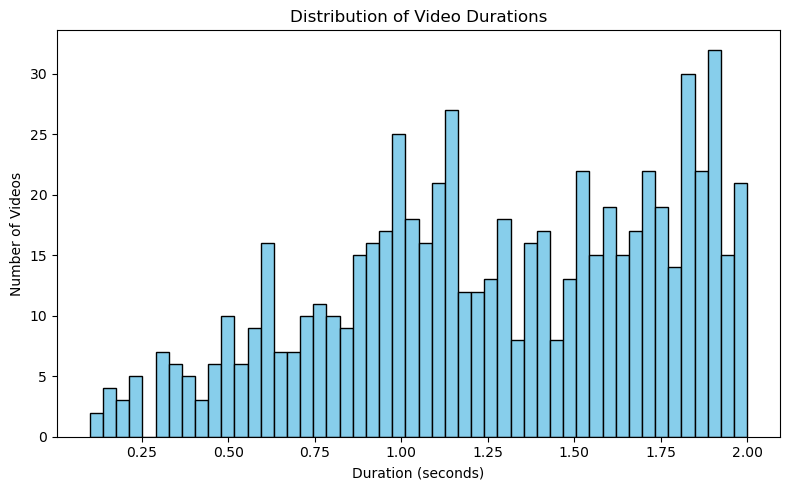

In [7]:
import matplotlib.pyplot as plt

durations = action_dataset['action_duration']

plt.figure(figsize=(8, 5))
plt.hist(durations, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Video Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of Videos')
plt.tight_layout()
plt.show()

### Dataset Analysis (Videos)

In [85]:
import os
import sys
from iv2_utils import iv2
from datasets import *

In [86]:
video_ids = set([x.split('.')[0] for x in os.listdir('dataset/video')])
videos = [os.path.join('dataset/video', x) for x in os.listdir('dataset/video')]

print(f"{len(videos)} videos found in dataset")
print(f"{len(set(videos))} unique videos found in dataset")

mp4_videos = []
mkv_videos = []
webm_videos = []

for video in videos:
    if video.endswith('.mp4'):
        mp4_videos.append(video)
    elif video.endswith('.mkv'):
        mkv_videos.append(video)
    elif video.endswith('.webm'):
        webm_videos.append(video)
    else:
        print(video)

print(f"\n{len(mp4_videos)} mp4 videos")
print(f"{len(mkv_videos)} mkv videos")
print(f"{len(webm_videos)} webm videos")

14950 videos found in dataset
14950 unique videos found in dataset

13545 mp4 videos
1386 mkv videos
19 webm videos


In [87]:
dataset = Dataset.from_json('activitynet.json')

Generating train split: 0 examples [00:00, ? examples/s]

In [88]:
mkv_videos[0]

'dataset/video/v_ILIpCfCWyT0.mkv'

In [89]:
'dataset/video/' + 'v_nHE7u40plD0.mkv' in mkv_videos

True

In [91]:
count = 0
for i in dataset:
    if not i['video'].endswith('mp4'):
        print(i)
        count += 1
        if count == 2:
            break

{'video': 'video/v_nHE7u40plD0.mkv', 'caption': 'People stand next to them and watch them play.', 'start_time': 67.68, 'end_time': 72.78, 'action_duration': 5.1}
{'video': 'video/v_nHE7u40plD0.mkv', 'caption': 'A little boy holding a yellow ball walks by.', 'start_time': 82.97, 'end_time': 87.33, 'action_duration': 4.36}
